<a href="https://colab.research.google.com/github/R21Rash/Lab2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython.display import Image
Image("image.png")
import numpy as np
np.set_printoptions(precision=4)
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(100)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()


W1 = [[0.1826 0.2304]
 [0.2705 0.3217]] 

 W2 = [[-1.819  -1.769 ]
 [ 1.1239  1.1739]] 

 Output = [[0.178  0.8771]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.020492276763740064


X.shape: (2, 400) Y.shape: (1, 400)


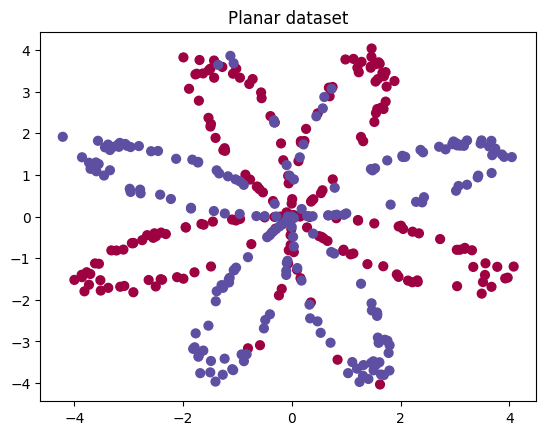

layer_sizes test -> (5, 4, 2)
init W1[0,0]: -0.004167578474054706
forward_propagation test -> means: -0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431
compute_cost test -> 0.6929198937741271
backprop test dW2[0,0]: 0.0036361325442942527
update_parameters test b2[0,0]: 0.0001045662146
predict test mean: 0.6666666666666666
Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219477
Cost after iteration 9000: 0.218564


/tmp/ipython-input-179223779.py:195: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_acc = float((np.dot(Y, preds.T) + np.dot(1 - Y, 1 - preds.T)) / Y.size * 100)


Training accuracy: 90.75%


/tmp/ipython-input-179223779.py:212: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acc_h = float((np.dot(Y, preds_h.T) + np.dot(1 - Y, 1 - preds_h.T)) / Y.size * 100)


Accuracy for 1 hidden units: 67.50%


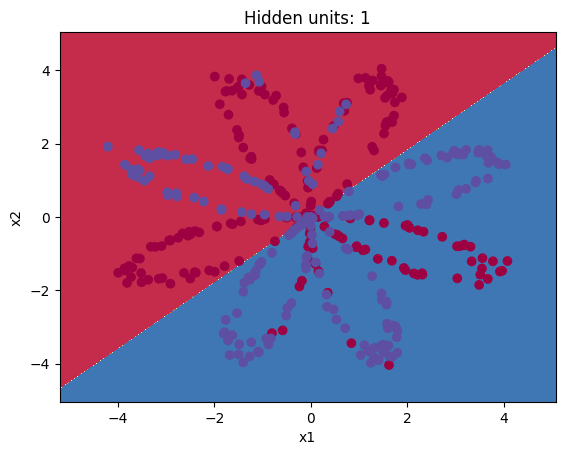

Accuracy for 2 hidden units: 67.25%


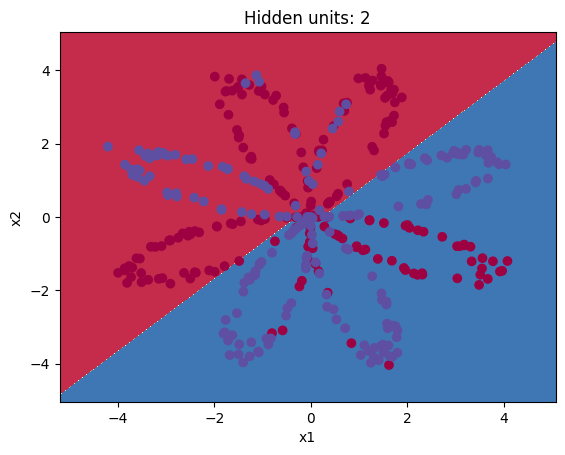

Accuracy for 3 hidden units: 90.75%


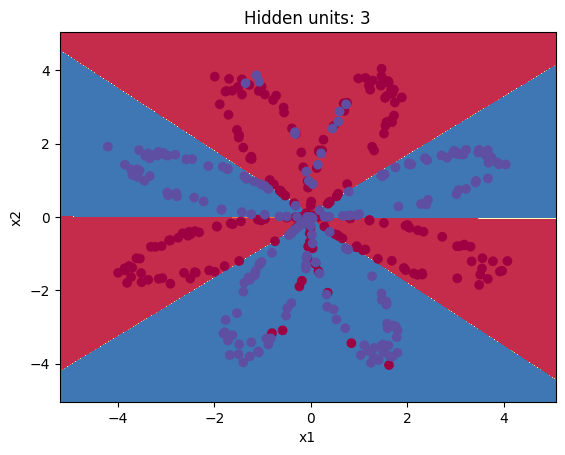

Accuracy for 4 hidden units: 90.50%


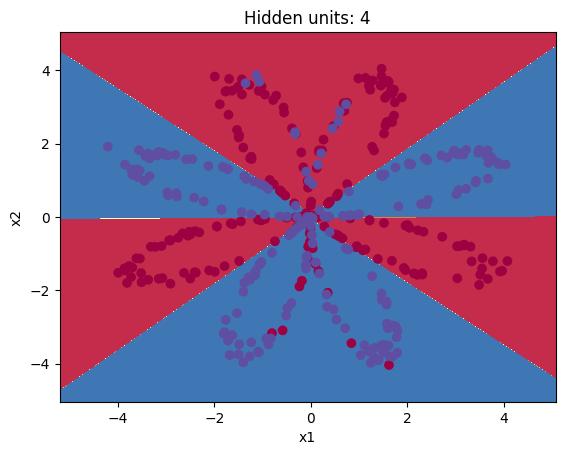

Accuracy for 5 hidden units: 91.25%


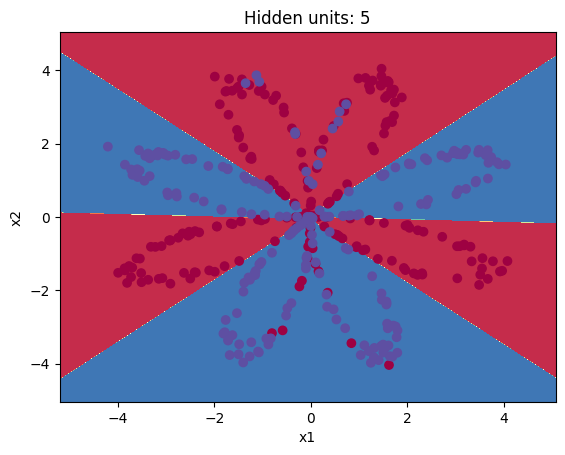

Accuracy for 20 hidden units: 90.50%


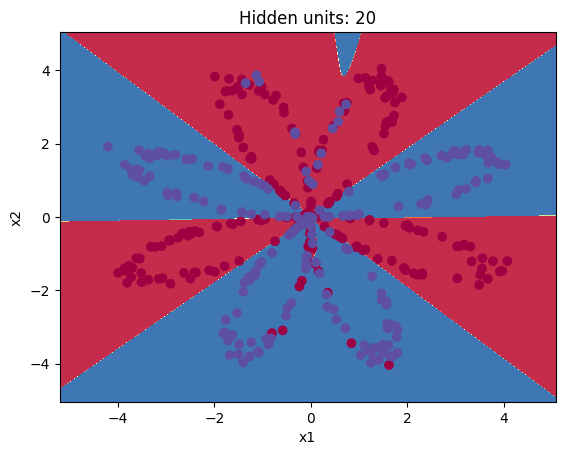

Accuracy for 50 hidden units: 90.25%


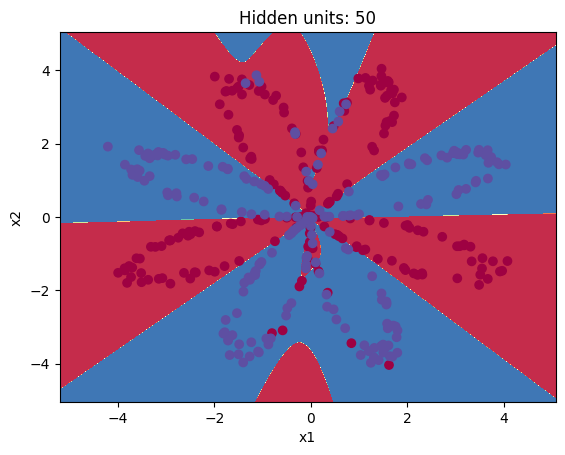

In [1]:
# =========================
# NN_sample - Colab Ready
# =========================

# %% [markdown]
# ## Neural network classification with one hidden layer
# You will:
# - Implement a 2-class neural net with one hidden layer
# - Use tanh nonlinearity
# - Compute cross-entropy loss
# - Implement forward & backward propagation
# - Tune hidden layer size

# %% [code]
# 1) Packages
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)  # reproducibility

# %% [markdown]
# 2) Dataset

# %% [code]
X, Y = load_planar_dataset()
print("X.shape:", X.shape, "Y.shape:", Y.shape)

# %% [code]
# Visualize
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)
plt.title("Planar dataset")
plt.show()

# %% [markdown]
# Helper: layer sizes

# %% [code]
def layer_sizes(X, Y):
    n_x = X.shape[0]  # input size
    n_h = 4           # hidden size (will tune later)
    n_y = Y.shape[0]  # output size
    return (n_x, n_h, n_y)

# quick test
X_assess, Y_assess = layer_sizes_test_case()
print("layer_sizes test ->", layer_sizes(X_assess, Y_assess))

# %% [markdown]
# Initialize parameters

# %% [code]
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    # sanity checks
    assert W1.shape == (n_h, n_x)
    assert b1.shape == (n_h, 1)
    assert W2.shape == (n_y, n_h)
    assert b2.shape == (n_y, 1)
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

# test
n_x, n_h, n_y = initialize_parameters_test_case()
p = initialize_parameters(n_x, n_h, n_y)
print("init W1[0,0]:", p["W1"][0,0])

# %% [markdown]
# Forward propagation

# %% [code]
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # from planar_utils
    assert A2.shape == (1, X.shape[1])
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# test
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print("forward_propagation test -> means:",
      np.mean(cache['Z1']), np.mean(cache['A1']),
      np.mean(cache['Z2']), np.mean(cache['A2']))

# %% [markdown]
# Compute cost (cross-entropy)

# %% [code]
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2 + 1e-12), Y) + np.multiply(np.log(1 - A2 + 1e-12), 1 - Y)
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)
    assert isinstance(cost, float)
    return cost

# test
A2, Y_assess, parameters = compute_cost_test_case()
print("compute_cost test ->", compute_cost(A2, Y_assess, parameters))

# %% [markdown]
# Backward propagation

# %% [code]
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # tanh'
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

# test
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("backprop test dW2[0,0]:", grads["dW2"][0,0])

# %% [markdown]
# Update parameters (GD)

# %% [code]
def update_parameters(parameters, grads, learning_rate=1.2):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    dW1, db1, dW2, db2 = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

# test
parameters, grads = update_parameters_test_case()
updated = update_parameters(parameters, grads)
print("update_parameters test b2[0,0]:", updated["b2"][0,0])

# %% [markdown]
# Train model (nn_model)

# %% [code]
def nn_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
    return parameters

# %% [markdown]
# Predict

# %% [code]
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5).astype(int)

# test
parameters, X_assess = predict_test_case()
preds = predict(parameters, X_assess)
print("predict test mean:", float(np.mean(preds)))

# %% [markdown]
# Train a model with n_h=4

# %% [code]
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, learning_rate=1.2, print_cost=True)
preds = predict(parameters, X)
train_acc = float((np.dot(Y, preds.T) + np.dot(1 - Y, 1 - preds.T)) / Y.size * 100)
print(f"Training accuracy: {train_acc:.2f}%")

# Optional: decision boundary (uncomment to view)
# plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
# plt.title("Decision boundary (n_h=4)")
# plt.show()

# %% [markdown]
# Hidden layer size tuning (required by the lab text)

# %% [code]
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for n_h in hidden_layer_sizes:
    params_h = nn_model(X, Y, n_h, num_iterations=5000, learning_rate=1.2, print_cost=False)
    preds_h = predict(params_h, X)
    acc_h = float((np.dot(Y, preds_h.T) + np.dot(1 - Y, 1 - preds_h.T)) / Y.size * 100)
    print(f"Accuracy for {n_h} hidden units: {acc_h:.2f}%")

    # Optional visualization (commented to keep it fast)
    plot_decision_boundary(lambda x: predict(params_h, x.T), X, Y)
    plt.title(f"Hidden units: {n_h}")
    plt.show()

# %% [markdown]
#  Write your short answers below (Text cell in Colab):
# Q1: What happens when the number of hidden nodes increases?
#When the number of hidden nodes increases, the neural network has more capacity to learn complex patterns.
#The decision boundary becomes more flexible, and training accuracy usually improves.
# Q2: Explain the pattern of accuracy when the hidden nodes increase.
#- With very few hidden nodes, the model underfits (high bias), giving low accuracy.
#- With a moderate number of nodes, the model captures the pattern well, achieving high accuracy.
#- With a very large number of nodes, the model can overfit the training data (low bias but high variance), which would reduce accuracy on unseen data (if tested on a separate test set).


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Targets: [1 3 9 3 1 7 2 4 8 0]


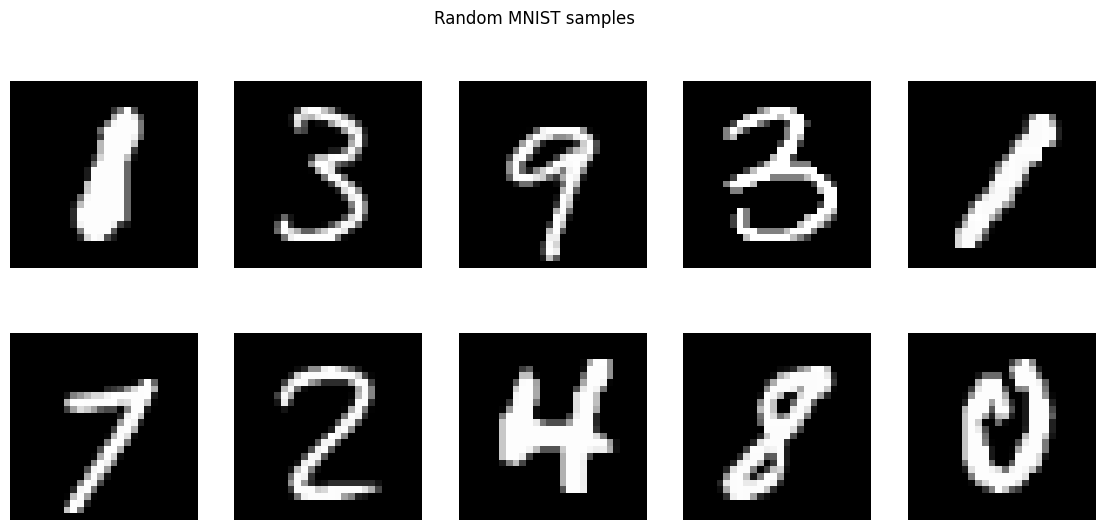

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7624 - loss: 0.8087
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9483 - loss: 0.1753
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1276
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0934
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0750
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0682
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9829 - loss: 0.0549
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0461
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0401
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0361
BASELINE → Test accuracy: 0.9752


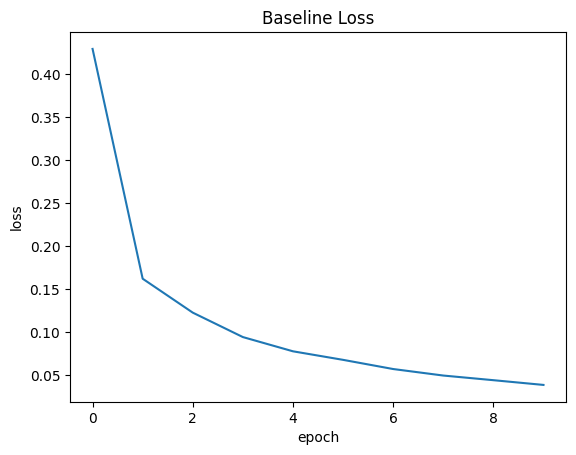

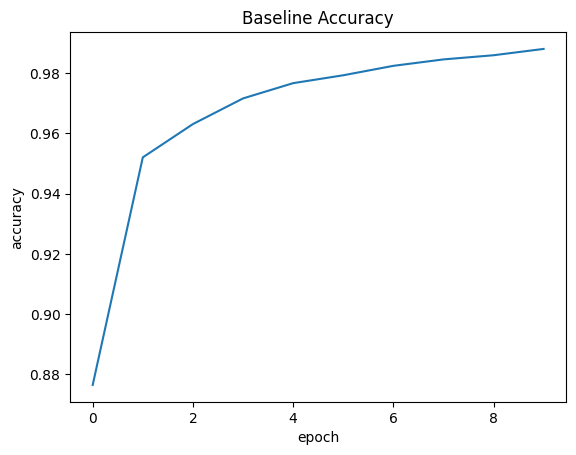

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8283 - loss: 0.5562 - val_accuracy: 0.9695 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9586 - loss: 0.1358 - val_accuracy: 0.9772 - val_loss: 0.0759 - learning_rate: 0.0010
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.0975 - val_accuracy: 0.9778 - val_loss: 0.0754 - learning_rate: 0.0010
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0752 - val_accuracy: 0.9792 - val_loss: 0.0702 - learning_rate: 0.0010
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0615 - val_accuracy: 0.9820 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9833 - loss: 0.0515 - val_accuracy: 0.9832 - val_loss: 0.0604 - learning_rate: 0.0010
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0454 -

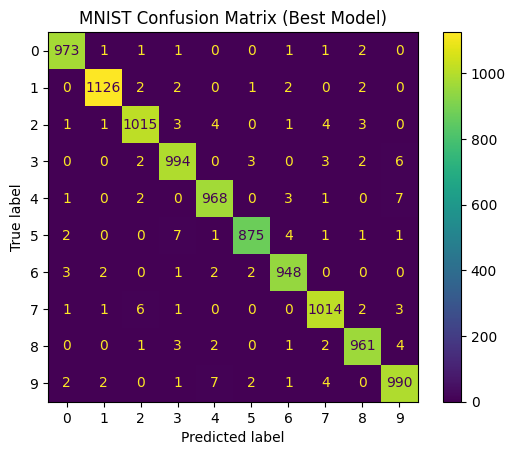

              precision    recall  f1-score   support

           0     0.9898    0.9929    0.9913       980
           1     0.9938    0.9921    0.9929      1135
           2     0.9864    0.9835    0.9850      1032
           3     0.9812    0.9842    0.9827      1010
           4     0.9837    0.9857    0.9847       982
           5     0.9909    0.9809    0.9859       892
           6     0.9865    0.9896    0.9880       958
           7     0.9845    0.9864    0.9854      1028
           8     0.9877    0.9867    0.9872       974
           9     0.9792    0.9812    0.9802      1009

    accuracy                         0.9864     10000
   macro avg     0.9864    0.9863    0.9863     10000
weighted avg     0.9864    0.9864    0.9864     10000

Class 0: 0.9929
Class 1: 0.9921
Class 2: 0.9835
Class 3: 0.9842
Class 4: 0.9857
Class 5: 0.9809
Class 6: 0.9896
Class 7: 0.9864
Class 8: 0.9867
Class 9: 0.9812


ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS.h5

In [2]:
# ============================
# MNIST MLP — Colab-ready
# ============================

# Imports
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers, callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1) Load data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# 2) Visualize a few samples
fig, axs = plt.subplots(2, 5, figsize=(14, 6))
idxs = np.random.randint(0, 60000, 10)
print("Targets:", train_target[idxs])
for i, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[idxs[i]], cmap='gray')
    ax.axis('off')
plt.suptitle("Random MNIST samples")
plt.show()

# 3) Preprocess
x_train = train_data.astype("float32") / 255.0
x_test  = test_data.astype("float32") / 255.0
y_train = to_categorical(train_target, num_classes=10)
y_test  = to_categorical(test_target,  num_classes=10)

# 4) Baseline model (simple MLP)
def build_baseline():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline = build_baseline()
hist_base = baseline.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)
loss_b, acc_b = baseline.evaluate(x_test, y_test, verbose=0)
print(f"BASELINE → Test accuracy: {acc_b:.4f}")

# Plot training curves (baseline)
plt.plot(hist_base.history['loss']); plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Baseline Loss'); plt.show()
plt.plot(hist_base.history['accuracy']); plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.title('Baseline Accuracy'); plt.show()

# 5) Tuned model (bigger net + dropout + callbacks)
def build_tuned():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cbs = [
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1),
    callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, verbose=1),
]

tuned = build_tuned()
hist_tuned = tuned.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_t, acc_t = tuned.evaluate(x_test, y_test, verbose=0)
print(f"TUNED → Test accuracy: {acc_t:.4f}")

# 6) L2 regularization model
def build_l2(l2=1e-4):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer=optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_l2 = build_l2(l2=1e-4)
hist_l2 = model_l2.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_l2, acc_l2 = model_l2.evaluate(x_test, y_test, verbose=0)
print(f"L2 → Test accuracy: {acc_l2:.4f}")

# 7) L1 + L2 regularization model
def build_l1l2(l1=1e-6, l2=1e-4):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer=optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_l1l2 = build_l1l2(l1=1e-6, l2=1e-4)
hist_l1l2 = model_l1l2.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_l1l2, acc_l1l2 = model_l1l2.evaluate(x_test, y_test, verbose=0)
print(f"L1+L2 → Test accuracy: {acc_l1l2:.4f}")

# 8) Pick your best model for confusion matrix
best_model = max(
    [('baseline', baseline, acc_b),
     ('tuned', tuned, acc_t),
     ('l2', model_l2, acc_l2),
     ('l1l2', model_l1l2, acc_l1l2)],
    key=lambda t: t[2]
)[1]

# 9) Confusion matrix + per-class report
y_prob = best_model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("MNIST Confusion Matrix (Best Model)")
plt.show()

print(classification_report(y_true, y_pred, digits=4))

per_class_acc = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_acc):
    print(f"Class {cls}: {acc:.4f}")

# 10) Save weights if you want
best_model.save_weights("MNIST_WEIGHTS.h5")
print("Saved best model weights to MNIST_WEIGHTS.h5")
